<a href="https://colab.research.google.com/github/siam-hossain9/weather-prediction-project/blob/main/weather_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()


Saving weather_prediction_bbq_labels.csv to weather_prediction_bbq_labels.csv
Saving weather_prediction_dataset.csv to weather_prediction_dataset.csv


In [4]:
import pandas as pd

data = pd.read_csv('weather_prediction_dataset.csv')
labels = pd.read_csv('weather_prediction_bbq_labels.csv')

print(data.head())
print(labels.head())


       DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  20000101      1                  8            0.89          1.0286   
1  20000102      1                  8            0.87          1.0318   
2  20000103      1                  5            0.81          1.0314   
3  20000104      1                  7            0.79          1.0262   
4  20000105      1                  5            0.90          1.0246   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.20                 0.03             0.0   
1                    0.25                 0.00             0.0   
2                    0.50                 0.00             3.7   
3                    0.63                 0.35             6.9   
4                    0.51                 0.07             3.7   

   BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_min  \
0              2.9             1.6  ...                -9.3   
1              3.6             2.7  ..

In [5]:
print(data.info())
print(labels.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Columns: 165 entries, DATE to TOURS_temp_max
dtypes: float64(150), int64(15)
memory usage: 4.6 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   DATE                    3654 non-null   int64
 1   BASEL_BBQ_weather       3654 non-null   bool 
 2   BUDAPEST_BBQ_weather    3654 non-null   bool 
 3   DE_BBQ_weather          3654 non-null   bool 
 4   DRESDEN_BBQ_weather     3654 non-null   bool 
 5   DUSSELDORF_BBQ_weather  3654 non-null   bool 
 6   HEATHROW_BBQ_weather    3654 non-null   bool 
 7   KASSEL_BBQ_weather      3654 non-null   bool 
 8   LJUBLJANA_BBQ_weather   3654 non-null   bool 
 9   MAASTRICHT_BBQ_weather  3654 non-null   bool 
 10  MALMO_BBQ_weather       3654 non-null   bool 
 11  MONTELIMAR_BBQ_weather  3654 non-null   bool 
 1

In [10]:
import pandas as pd

data = pd.read_csv('weather_prediction_dataset.csv')

data = data.sort_values('DATE')

data['Basel_temp_mean_next_day'] = data['BASEL_temp_mean'].shift(-1)

data = data[:-1]

features = ['BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure',
            'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_sunshine',
            'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max']

X = data[features]
y = data['Basel_temp_mean_next_day']

print(X.head())
print(y.head())


   BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0                  8            0.89          1.0286                    0.20   
1                  8            0.87          1.0318                    0.25   
2                  5            0.81          1.0314                    0.50   
3                  7            0.79          1.0262                    0.63   
4                  5            0.90          1.0246                    0.51   

   BASEL_precipitation  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0.03             0.0              2.9             1.6   
1                 0.00             0.0              3.6             2.7   
2                 0.00             3.7              2.2             0.1   
3                 0.35             6.9              3.9             0.5   
4                 0.07             3.7              6.0             3.8   

   BASEL_temp_max  
0             3.9  
1             4.8  
2       

Mean Squared Error: 4.351
R^2 Score: 0.920


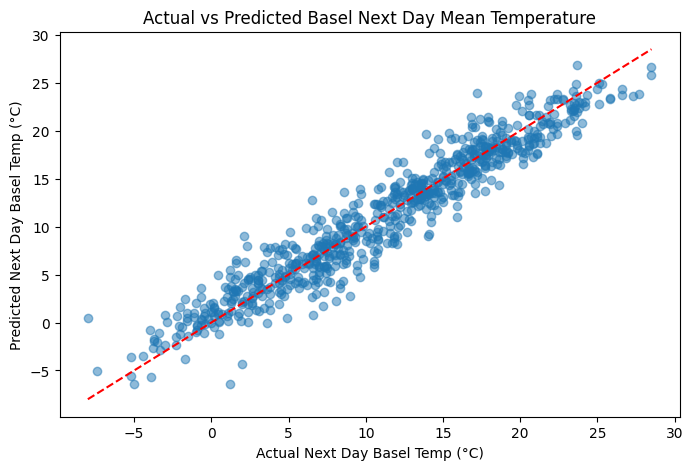

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


data = pd.read_csv('weather_prediction_dataset.csv')


data = data.sort_values('DATE')


data['Basel_temp_mean_next_day'] = data['BASEL_temp_mean'].shift(-1)


data = data[:-1]


features = ['BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure',
            'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_sunshine',
            'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max']

X = data[features]
y = data['Basel_temp_mean_next_day']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.3f}")
print(f"R^2 Score: {r2:.3f}")


plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Next Day Basel Temp (°C)')
plt.ylabel('Predicted Next Day Basel Temp (°C)')
plt.title('Actual vs Predicted Basel Next Day Mean Temperature')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


Mean Squared Error: 4.116
R^2 Score: 0.924


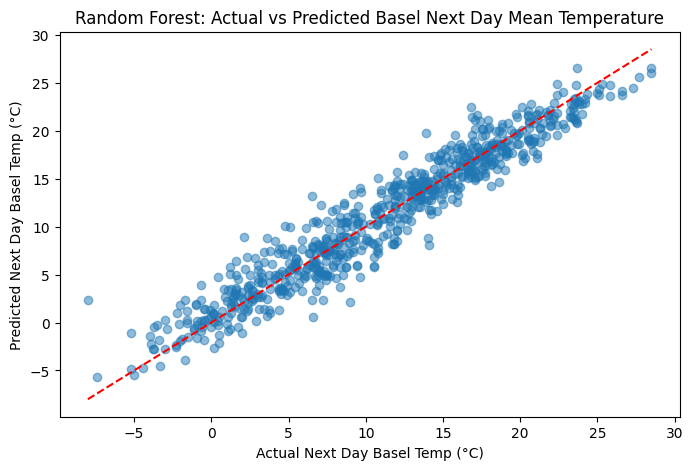

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


data = pd.read_csv('weather_prediction_dataset.csv')


data = data.sort_values('DATE')


data['Basel_temp_mean_next_day'] = data['BASEL_temp_mean'].shift(-1)
data = data[:-1]  # Drop last row without target


features = ['BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure',
            'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_sunshine',
            'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max']

X = data[features]
y = data['Basel_temp_mean_next_day']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.3f}")
print(f"R^2 Score: {r2:.3f}")

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Next Day Basel Temp (°C)')
plt.ylabel('Predicted Next Day Basel Temp (°C)')
plt.title('Random Forest: Actual vs Predicted Basel Next Day Mean Temperature')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


Mean Squared Error: 4.037
R^2 Score: 0.925


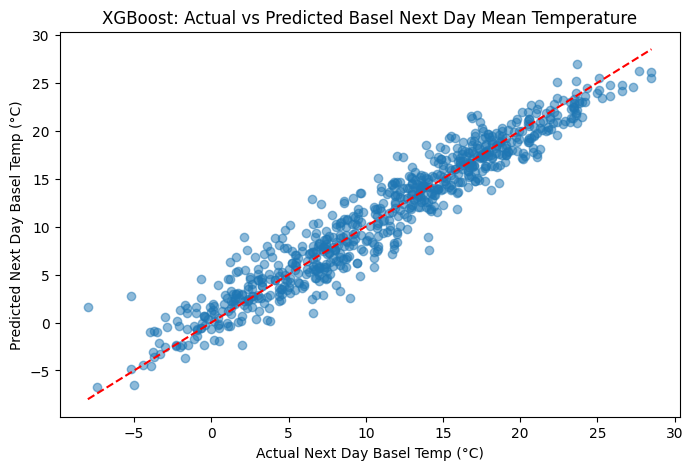

In [14]:
!pip install xgboost
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor


data = pd.read_csv('weather_prediction_dataset.csv')
data = data.sort_values('DATE')


data['Basel_temp_mean_next_day'] = data['BASEL_temp_mean'].shift(-1)
data = data[:-1]

features = ['BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure',
            'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_sunshine',
            'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max']

X = data[features]
y = data['Basel_temp_mean_next_day']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.3f}")
print(f"R^2 Score: {r2:.3f}")


plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Next Day Basel Temp (°C)')
plt.ylabel('Predicted Next Day Basel Temp (°C)')
plt.title('XGBoost: Actual vs Predicted Basel Next Day Mean Temperature')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
